# DIP 第三章作业
李杰 2022Z8017782096

图片导入并导入包并实现LoG算法

In [36]:
from math import fabs,sin,cos,radians,log10,sqrt
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import pylab
from scipy import signal

img = cv2.imread(r'D:/works/mastercorse/DIP/DIP_3/Chapter3_1.pgm',-1)
print("image read!")
print(img.shape)
size = (9,9)
# 图像转为灰度图
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def kernel(sigma, size):
    H, W = size
    r, c = np.mgrid[0:H:1, 0:W:1]
    r -= int((H-1)/2)
    c -= int((W-1)/2)
    x2andy2 = np.power(r, 2.0) + np.power(c, 2.0)

    kernel = (x2andy2 / pow(sigma, 4.0) - 2/pow(sigma, 2.0)) * np.exp(- x2andy2 / (2 * pow(sigma, 2.0)))
    return kernel


def LoG(image, sigma, size, _boundary="symm"):
    loGkernel = kernel(sigma, size)
    img_log = signal.convolve2d(image, loGkernel, 'same', boundary=_boundary)
    return img_log

def process(sigma, size):
    img_log = LoG(img, sigma, size, 'symm')
    plt.subplot(1, 2, 1)
    plt.title("LoG algorithm")
    plt.imshow(img_log,cmap = 'gray')
    edge = np.copy(img_log)
    edge[edge > 60] = 255
    edge[edge < 60] = 0
    edge = edge.astype(np.uint8)
    plt.subplot(1, 2, 2)
    plt.title("Find the zero intersection")
    plt.imshow(edge,cmap = 'gray')


image read!
(146, 181)


### 取σ =1.2然后求零交叉的结果 分别将模板大小取[9, 12, 15]

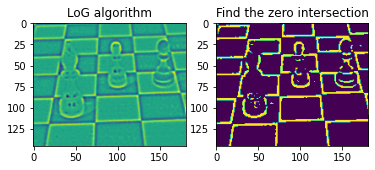

In [37]:
sigma, size = 1.2, [9,9]
process(sigma, size)

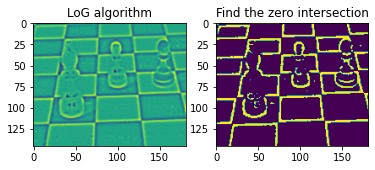

In [38]:
sigma, size = 1.2, [12,12]
process(sigma, size)

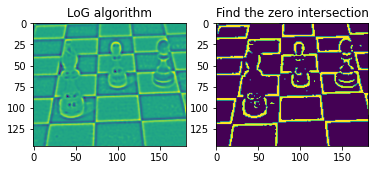

In [39]:
sigma, size = 1.2, [15,15]
process(sigma, size)

### 取σ = 2.8然后求零交叉的结果 分别将模板大小取[12, 15, 18]

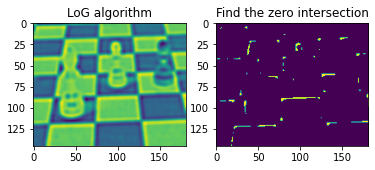

In [40]:
sigma, size = 2.8, [12,12]
process(sigma, size)

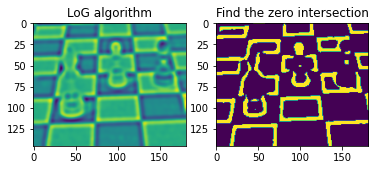

In [41]:
sigma, size = 2.8, [15,15]
process(sigma, size)

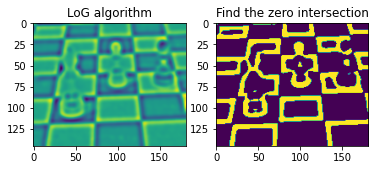

In [42]:
sigma, size = 2.8, [18,18]
process(sigma, size)

### 讨论和结论：零交叉对σ的依赖性
对上面6组图片（log算法处理后，加阈值处理后）进行分析：
可以看到，相较于σ 较小时，图像边缘的细节在 σ 大时较少，σ 越大，边缘检测效果变差，而在同样的 σ 下，处理模板的大小(Kernel Size)，对细节的展现的影响较小。

零交叉点实际上计算二阶导数实质上是亮度梯度的变化率，对应了图像中灰度值的剧烈变化的部分，也就是我们需要的图像边缘。

零交叉点对 σ 的依赖：LoG模板N的大小和标准差的关系，遵循高斯分布的3σ原则，也就是当位置超过均值正负3σ 以外的值很小，LOG模板应该选择大于6σ 的最小奇数作为模板大小，Kernel Size过大增加计算量，过小会造成截断，无法得到图像边缘,所以应该选择合适的模板大小。